**Project Name: Predicting An Airline's Customer Satisfaction Using Supervised Machine Learning**

Goals:

- To discover the most important service factors that contribute to passengers' satisfaction through feature selection
- To discover the appropriate machine learning algorithms that can best predict customer satisfaction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [2]:
data=pd.read_csv("https://github.com/dms-aditama/Datasets/blob/main/Invistico_Airline.csv?raw=true")

In [3]:
pd.set_option('display.max_columns', 50)
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [4]:
data.shape

(129880, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

**Data Cleaning**

In [6]:
#Tidying up column names in better format
data.rename(columns = {'satisfaction':'Satisfaction',
                       'Customer Type':'Customer type',
                       'Type of Travel':'Type of travel',
                       'Flight Distance':'Flight distance',
                       'Departure/Arrival time convenient':'Time convenience',
                       'Inflight wifi service':'Inflight wifi',
                       'Ease of Online booking':'Ease of online booking',
                       'Leg room service':'Legroom service',
                       'Checkin service':'Check-in service',
                       'Departure Delay in Minutes':'Departure delay',
                       'Arrival Delay in Minutes':'Arrival delay'}, 
            inplace = True)

data.head()

,Satisfaction,Gender,Customer type,Age,Type of travel,Class,Flight distance,Seat comfort,Time convenience,Food and drink,Gate location,Inflight wifi,Inflight entertainment,Online support,Ease of online booking,On-board service,Legroom service,Baggage handling,Check-in service,Cleanliness,Online boarding,Departure delay,Arrival delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [7]:
#Checking duplicates
data=data.drop_duplicates()

In [8]:
#Checking nulls
data.isna().sum()

Satisfaction                0
Gender                      0
Customer type               0
Age                         0
Type of travel              0
Class                       0
Flight distance             0
Seat comfort                0
Time convenience            0
Food and drink              0
Gate location               0
Inflight wifi               0
Inflight entertainment      0
Online support              0
Ease of online booking      0
On-board service            0
Legroom service             0
Baggage handling            0
Check-in service            0
Cleanliness                 0
Online boarding             0
Departure delay             0
Arrival delay             393
dtype: int64

**Null Treatment: Delays**

In [9]:
data[['Arrival delay', 'Departure delay']]

,Arrival delay,Departure delay
0,0.0,0
1,305.0,310
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
129875,0.0,0
129876,172.0,174
129877,163.0,155
129878,205.0,193


In [10]:
data[['Arrival delay', 'Departure delay']].describe()

,Arrival delay,Departure delay
count,129487.000000,129880.000000
mean,15.091129,14.713713
std,38.465650,38.071126
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,13.000000,12.000000
max,1584.000000,1592.000000


In this case I decide to impute the nulls in Arrival Delay with the values of Departure Delay, considering arrival delay is closely linked with departure delay.
    
Let's say there is an entry where Departure delay = 100 and Arrival delay = nulls. Imputing the nulls with any value from descriptive statistics such as mean/median/mode can be very misleading, because for that entry, the arrival delay would either be 0 or 15 while in actuality, the arrival and departure delays only differ by a few minutes.

In [11]:
#imputing nulls in Arrival delay with data in Departure delay
data['Arrival delay'] = data['Arrival delay'].fillna(data['Departure delay'])
data['Arrival delay'] = data['Arrival delay'].astype(int)

**Null Treatment: Ordinal Data**

The results of the survey are given in ordinal data from 1 = dissatisfied to 5 = satisfied. The value of 0 in column #7 - #20 signify nulls. I impute the nulls with mode instead of median, because: 1) The data is ordinal, 2) The distribution of the data is skewed, 3) If there are even numbers of data for the median, it will average out the two middlemost numbers, giving out the possibility of having decimal outcome which is in different format with the whole number of the ordinal data

In [12]:
for column in data.iloc[:, 7:-2].columns:
    data[column].replace(0, np.nan, inplace=True)
    
#replacing 0 with NaN to make it easier for us to see the nulls

In [13]:
for column in data.iloc[:, 7:-2].columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data.iloc[:, 7:-2] = data.iloc[:, 7:-2].astype(int)
#imputing the NaN with mode

In [14]:
data.head()

,Satisfaction,Gender,Customer type,Age,Type of travel,Class,Flight distance,Seat comfort,Time convenience,Food and drink,Gate location,Inflight wifi,Inflight entertainment,Online support,Ease of online booking,On-board service,Legroom service,Baggage handling,Check-in service,Cleanliness,Online boarding,Departure delay,Arrival delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,3,4,3,2,2,4,2,3,3,4,3,5,3,2,0,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,3,4,3,3,4,2,2,3,4,4,4,2,3,2,310,305
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,3,4,3,3,2,4,2,2,3,3,4,4,4,2,0,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,3,4,3,3,3,4,3,1,1,4,1,4,1,3,0,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,3,4,3,3,4,3,4,2,2,4,2,4,2,5,0,0


**Data Encoding**

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
data_encode = data.copy()

In [17]:
lE = LabelEncoder()
data_encode['Satisfaction'] = lE.fit_transform(data_encode['Satisfaction'])     #0 = dissatisfied, 1 = satisfied
data_encode['Gender'] = lE.fit_transform(data_encode['Gender'])                 #0 = female, 1 = male
data_encode['Customer type'] = lE.fit_transform(data_encode['Customer type'])   #0 = loyal, 1 = disloyal
data_encode['Type of travel'] = lE.fit_transform(data_encode['Type of travel']) #0 = business travel, 1 = personal travel
data_encode.replace(to_replace ="Eco", value = 0, inplace=True)
data_encode.replace(to_replace ="Eco Plus", value = 1, inplace=True)
data_encode.replace(to_replace ="Business", value = 2, inplace=True)

In [18]:
data_encode

,Satisfaction,Gender,Customer type,Age,Type of travel,Class,Flight distance,Seat comfort,Time convenience,Food and drink,Gate location,Inflight wifi,Inflight entertainment,Online support,Ease of online booking,On-board service,Legroom service,Baggage handling,Check-in service,Cleanliness,Online boarding,Departure delay,Arrival delay
0,1,0,0,65,1,0,265,3,4,3,2,2,4,2,3,3,4,3,5,3,2,0,0
1,1,1,0,47,1,2,2464,3,4,3,3,4,2,2,3,4,4,4,2,3,2,310,305
2,1,0,0,15,1,0,2138,3,4,3,3,2,4,2,2,3,3,4,4,4,2,0,0
3,1,0,0,60,1,0,623,3,4,3,3,3,4,3,1,1,4,1,4,1,3,0,0
4,1,0,0,70,1,0,354,3,4,3,3,4,3,4,2,2,4,2,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,29,1,0,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0
129876,0,1,1,63,1,2,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172
129877,0,1,1,69,1,0,2320,3,4,3,3,3,2,2,4,4,3,4,2,3,2,155,163
129878,0,1,1,66,1,0,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205


In [19]:
#Assigning numerical values and storing in another column for Class (test)
data_encode['Class_LE'] = lE.fit_transform(data_encode['Class'])
set(data_encode['Class_LE'])

{0, 1, 2}

In [20]:
#If we use LE to encode "Class", the result wouldn't be what we want because the values in column "Class" are actually ordinal where:
#Eco < Eco Plus < Business = 0 < 1 < 2
#LE results to 0 = Business, 1 = Eco, 2 = Eco Plus (in alphabetical order)
#Therefore we need to manually encode the feature "Class"

In [21]:
data_encode.replace(to_replace ="Eco", value = 0, inplace=True)
data_encode.replace(to_replace ="Eco Plus", value = 1, inplace=True)
data_encode.replace(to_replace ="Business", value = 2, inplace=True)

In [22]:
data_encode.drop(columns=['Class_LE'], inplace=True)

In [23]:
#Freshly encoded data
data_encode.head()

,Satisfaction,Gender,Customer type,Age,Type of travel,Class,Flight distance,Seat comfort,Time convenience,Food and drink,Gate location,Inflight wifi,Inflight entertainment,Online support,Ease of online booking,On-board service,Legroom service,Baggage handling,Check-in service,Cleanliness,Online boarding,Departure delay,Arrival delay
0,1,0,0,65,1,0,265,3,4,3,2,2,4,2,3,3,4,3,5,3,2,0,0
1,1,1,0,47,1,2,2464,3,4,3,3,4,2,2,3,4,4,4,2,3,2,310,305
2,1,0,0,15,1,0,2138,3,4,3,3,2,4,2,2,3,3,4,4,4,2,0,0
3,1,0,0,60,1,0,623,3,4,3,3,3,4,3,1,1,4,1,4,1,3,0,0
4,1,0,0,70,1,0,354,3,4,3,3,4,3,4,2,2,4,2,4,2,5,0,0


**EDA#1: Are the 'satisfied' and 'dissatisfied' responses balanced?**

<AxesSubplot:xlabel='Satisfaction', ylabel='Count'>

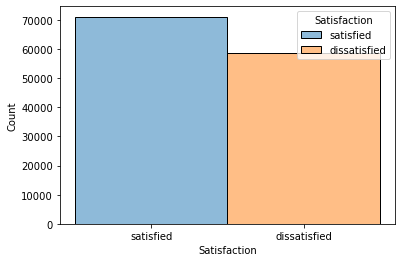

In [24]:
sns.histplot(data=data, x="Satisfaction", hue="Satisfaction")

In [25]:
satisfied_percent = len(data[data['Satisfaction'] == 'satisfied']) / len(data) * 100
dissatisfied_percent = 100 - satisfied_percent

print(f"Satisfied = {satisfied_percent}")
print(f"Dissatified = {dissatisfied_percent}")

Satisfied = 54.73283030489683
Dissatified = 45.26716969510317


With a difference of less than 10%, the responses can be seen as balanced. Therefore, the data needs no imbalanced-data treatment

**EDA2: Age Factor**

,Age
count,129880.000000
mean,39.427957
std,15.119360
min,7.000000
25%,27.000000
50%,40.000000
75%,51.000000
max,85.000000


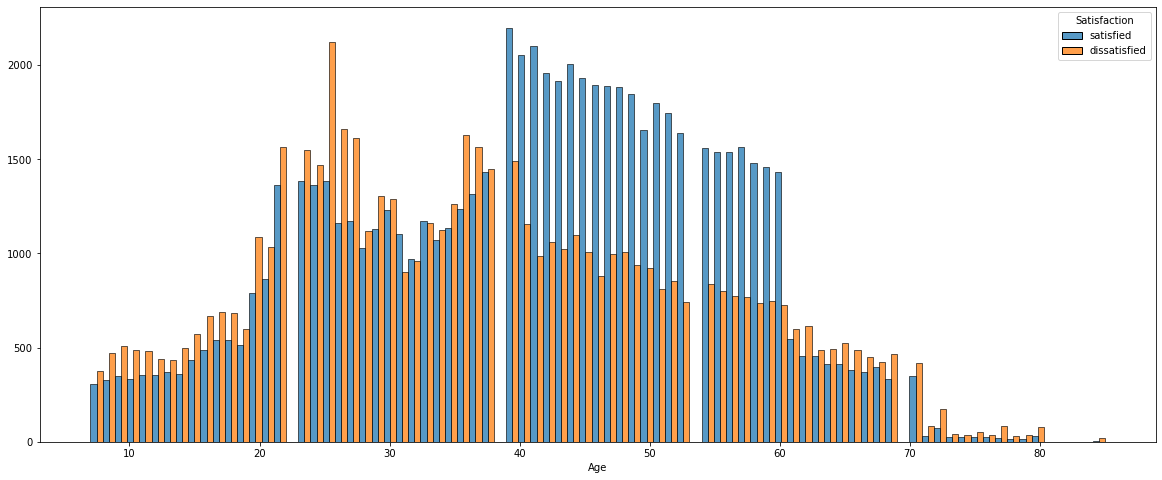

In [26]:
plt.figure(figsize = (20, 8))

plt1 = sns.histplot(data=data, x="Age", hue="Satisfaction", multiple="dodge")
plt1.set(xlabel = 'Age', ylabel= '')

data_encode[['Age']].describe()

From the plot above, we can see that passengers at the age group of 40-60 give significantly more positive responses of satisfaction. Outside of that age group, the 'dissatisfied' responses are higher than 'satisfied'

**EDA 3: Flight Distance**

,Flight distance
count,129880.000000
mean,1981.409055
std,1027.115606
min,50.000000
25%,1359.000000
50%,1925.000000
75%,2544.000000
max,6951.000000


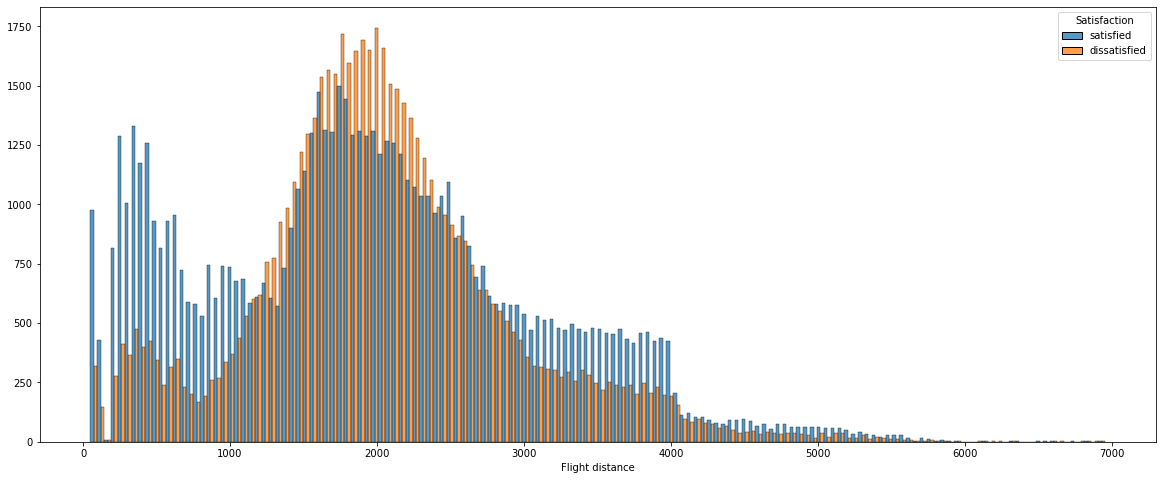

In [27]:
plt.figure(figsize = (20, 8))

plt1 = sns.histplot(data=data, x="Flight distance", hue="Satisfaction", multiple="dodge")
plt1.set(xlabel = 'Flight distance', ylabel= '')

data_encode[['Flight distance']].describe()

From the plot above, we can see a trend where:
- More satisfied responses occur in two distance groups: 0 - 1100km and above 2700km
- More dissatisfied responses occur in flight distance range of 1150km to 2650km

**EDA 4: Gender Factor**

[Text(0.5, 0, 'Gender'), Text(0, 0.5, '')]

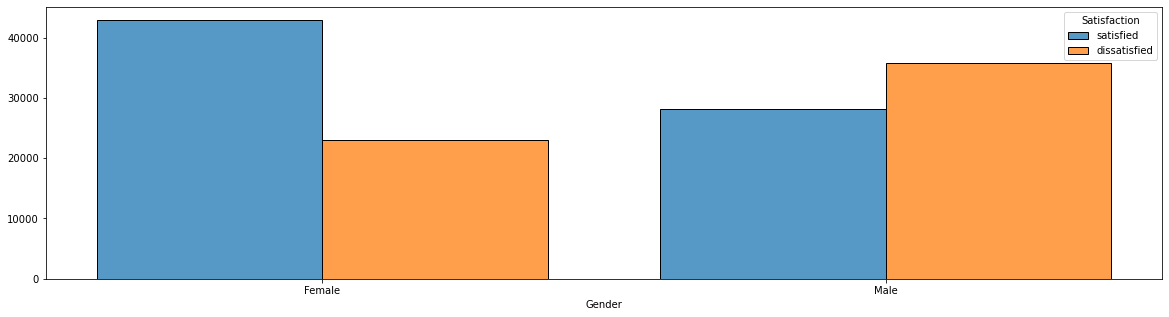

In [28]:
plt.figure(figsize = (20, 5))

plt1 = sns.histplot(data=data, x="Gender", hue="Satisfaction", multiple="dodge", shrink=.8)
plt1.set(xlabel = 'Gender', ylabel= '')

Female passengers give higher proportion of satisfied response than male passengers.

**EDA 5: Class Factor**

[Text(0.5, 0, 'Class'), Text(0, 0.5, '')]

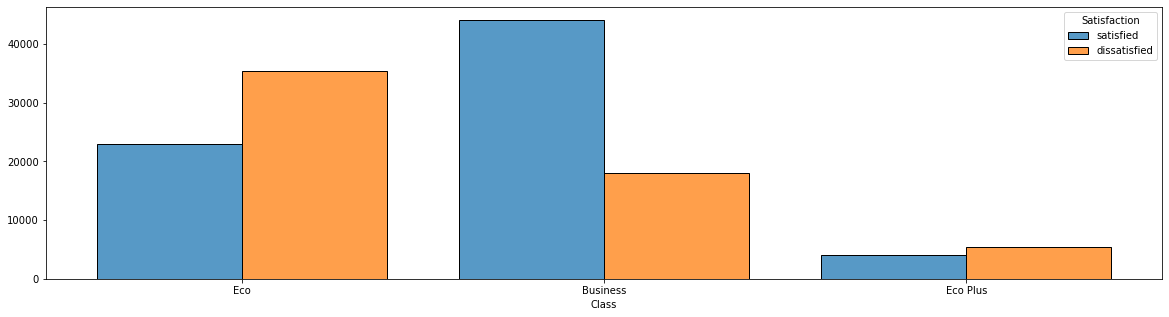

In [29]:
plt.figure(figsize = (20, 5))

plt1 = sns.histplot(data=data, x="Class", hue="Satisfaction", multiple="dodge", shrink=.8)
plt1.set(xlabel = 'Class', ylabel= '')

Business class is the only class out of three where satisfied responses are more than the dissatisfied ones. Dissatisfied responses are higher in both economy and economy plus classes, however, the proportion is a lot higher in economy class

In [30]:
data.head()

,Satisfaction,Gender,Customer type,Age,Type of travel,Class,Flight distance,Seat comfort,Time convenience,Food and drink,Gate location,Inflight wifi,Inflight entertainment,Online support,Ease of online booking,On-board service,Legroom service,Baggage handling,Check-in service,Cleanliness,Online boarding,Departure delay,Arrival delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,3,4,3,2,2,4,2,3,3,4,3,5,3,2,0,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,3,4,3,3,4,2,2,3,4,4,4,2,3,2,310,305
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,3,4,3,3,2,4,2,2,3,3,4,4,4,2,0,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,3,4,3,3,3,4,3,1,1,4,1,4,1,3,0,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,3,4,3,3,4,3,4,2,2,4,2,4,2,5,0,0


**EDA 6: Flight Delay**

,Departure delay,Arrival delay
count,129880.000000,129880.000000
mean,14.713713,15.160102
std,38.071126,38.599601
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


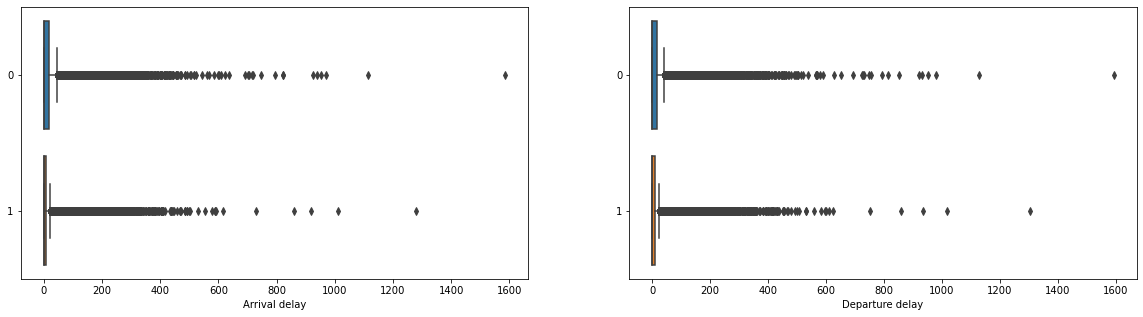

In [31]:
plt.figure(figsize = (20, 5))
 
# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)
plt1 = sns.boxplot(x=data_encode["Arrival delay"], y=data_encode["Satisfaction"], orient='h')
plt1.set(xlabel = 'Arrival delay', ylabel= '')
 
# using subplot function and creating plot two
plt.subplot(1, 2, 2)
plt1 = sns.boxplot(x=data_encode["Departure delay"], y=data_encode["Satisfaction"], orient='h')
plt1.set(xlabel = 'Departure delay', ylabel= '')

data_encode[['Departure delay', 'Arrival delay']].describe()


As for the delays, I choose not to drop the outliers because the nature of delay by itself is an outlier -- people would expect their flights to run on time. Removing the outliers, especially as many as those in the plots, would mean losing significant information

**EDA 7: Flight Delay**

[Text(0.5, 0, 'Online boarding'), Text(0, 0.5, '')]

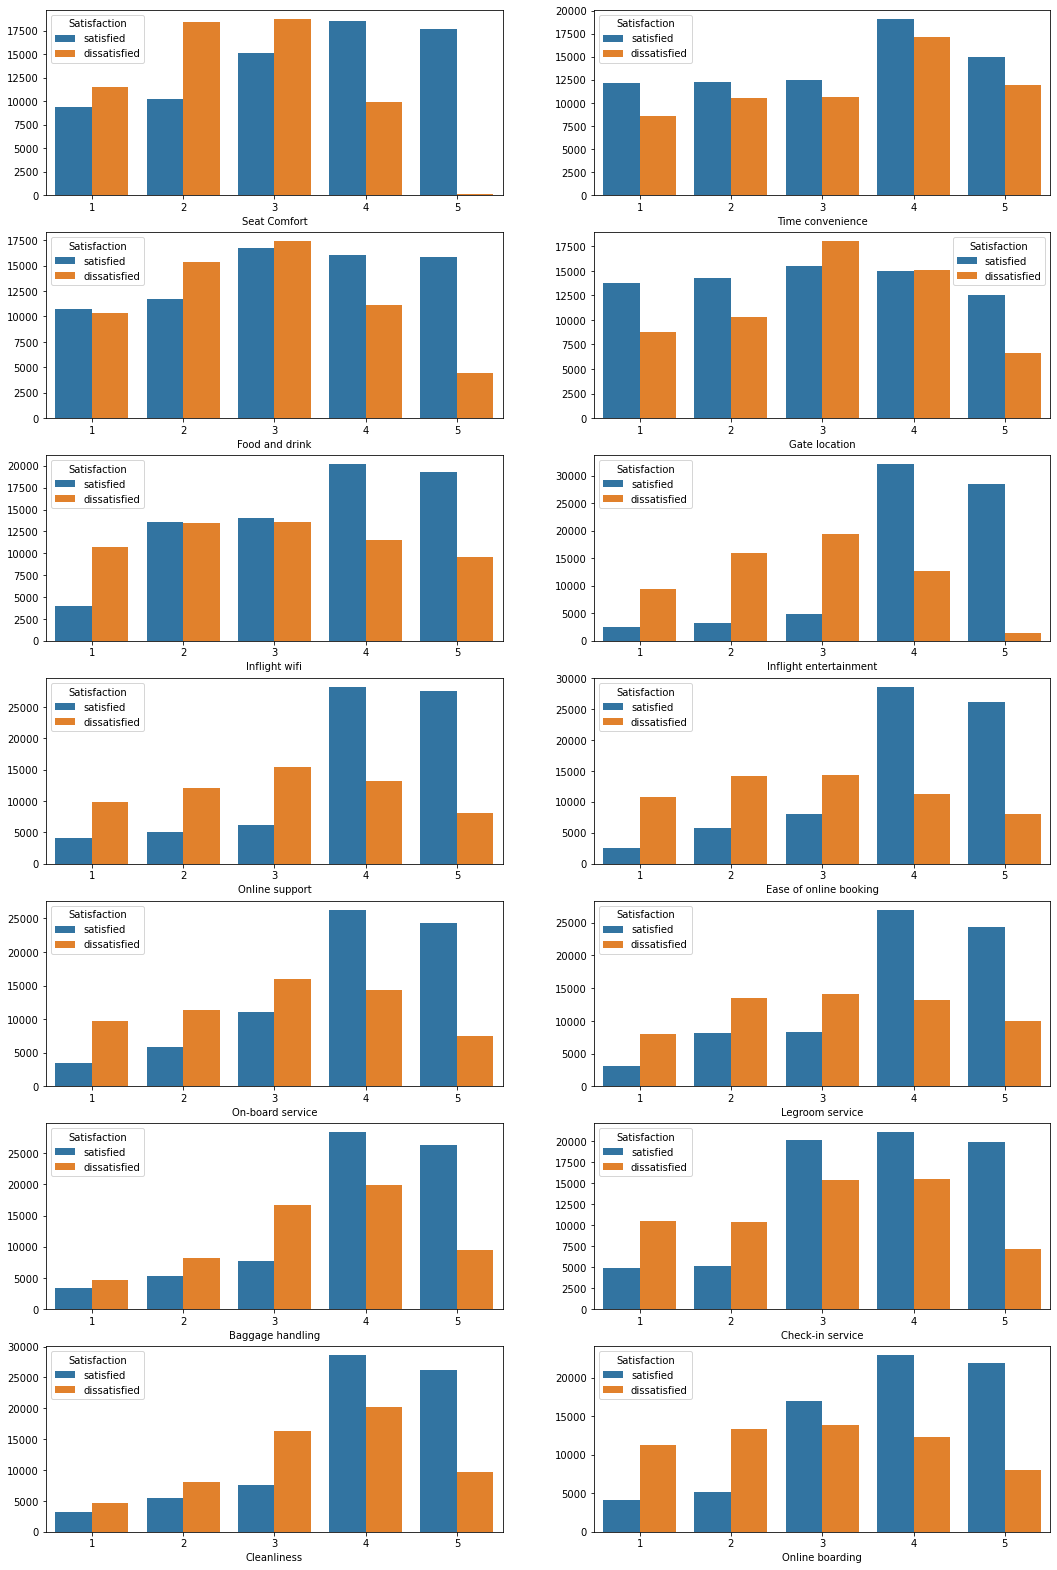

In [32]:
fig, axs = plt.subplots(7, 2, figsize=(18, 28))

plt1 = sns.countplot(data=data, x="Seat comfort", hue="Satisfaction", ax = axs[0,0])
plt1.set(xlabel = 'Seat Comfort', ylabel= '')

plt1 = sns.countplot(data=data, x="Time convenience", hue="Satisfaction", ax = axs[0,1])
plt1.set(xlabel = 'Time convenience', ylabel= '')

plt1 = sns.countplot(data=data, x="Food and drink", hue="Satisfaction", ax = axs[1,0])
plt1.set(xlabel = 'Food and drink', ylabel= '')

plt1 = sns.countplot(data=data, x="Gate location", hue="Satisfaction", ax = axs[1,1])
plt1.set(xlabel = 'Gate location', ylabel= '')

plt1 = sns.countplot(data=data, x="Inflight wifi", hue="Satisfaction", ax = axs[2,0])
plt1.set(xlabel = 'Inflight wifi', ylabel= '')

plt1 = sns.countplot(data=data, x="Inflight entertainment", hue="Satisfaction", ax = axs[2,1])
plt1.set(xlabel = 'Inflight entertainment', ylabel= '')

plt1 = sns.countplot(data=data, x="Online support", hue="Satisfaction", ax = axs[3,0])
plt1.set(xlabel = 'Online support', ylabel= '')

plt1 = sns.countplot(data=data, x="Ease of online booking", hue="Satisfaction", ax = axs[3,1])
plt1.set(xlabel = 'Ease of online booking', ylabel= '')

plt1 = sns.countplot(data=data, x="On-board service", hue="Satisfaction", ax = axs[4,0])
plt1.set(xlabel = 'On-board service', ylabel= '')

plt1 = sns.countplot(data=data, x="Legroom service", hue="Satisfaction", ax = axs[4,1])
plt1.set(xlabel = 'Legroom service', ylabel= '')

plt1 = sns.countplot(data=data, x="Baggage handling", hue="Satisfaction", ax = axs[5,0])
plt1.set(xlabel = 'Baggage handling', ylabel= '')

plt1 = sns.countplot(data=data, x="Check-in service", hue="Satisfaction", ax = axs[5,1])
plt1.set(xlabel = 'Check-in service', ylabel= '')

plt1 = sns.countplot(data=data, x="Cleanliness", hue="Satisfaction", ax = axs[6,0])
plt1.set(xlabel = 'Cleanliness', ylabel= '')

plt1 = sns.countplot(data=data, x="Online boarding", hue="Satisfaction", ax = axs[6,1])
plt1.set(xlabel = 'Online boarding', ylabel= '')


Looking at the maximum value of survey response (5) in these 14 variables, 2 variables stand out: *seat comfort* and *inflight entertainment*. Almost all passengers who put 5 as their response to these two variables are satisfied. Could these two be the most important variables that contribute to passengers' satisfaction? To answer that, I use feature selection

**Feature Selection 1: Heatmap Correlation**

<AxesSubplot:>

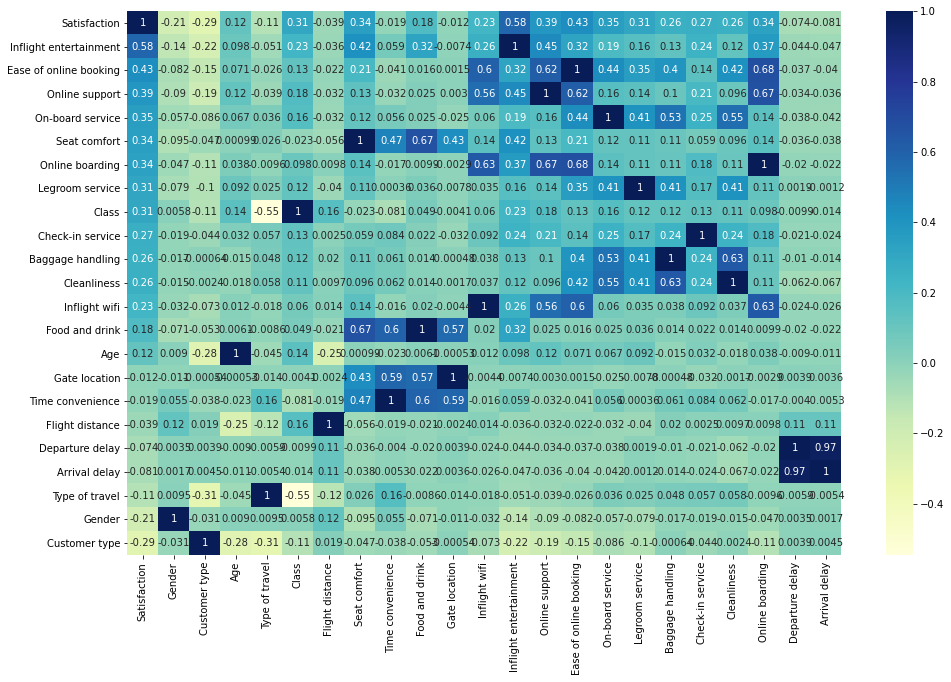

In [33]:
plt.figure(figsize = (16, 10))
sns.heatmap(data_encode.corr().sort_values('Satisfaction', ascending=False), annot = True, cmap="YlGnBu")

From the above heatmap plot, the top features that correlate strongly with Satisfaction are:

Inflight entertainment, Ease of online booking, Online support, On-board service, Seat comfort, Online boarding, Legroom service, Class

**Feature Selection 2: Select K-best with chi-square**

In [34]:
#First we need to separate the target (i.e satisfaction) from other parameters

x_B = data_encode.iloc[:, 1:] #ngambil semua kolom kecuali kolom paling kiri (Satisfaction)
y_B = data_encode.iloc[:, :1] #ngambil kolom paling kiri yaitu Satisfaction

In [35]:
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2, k=16)
#choosing the best, K= the number of features we want to see the best
#the best based on what? Based on the score function of chi2

fit = best_features.fit(x_B,y_B)
#the algorithm "SelectKBest" will calculate chi2 from x to y, and will select the best 10

#How to see the scores?
#(fit.scores_)

data_score = pd.DataFrame(fit.scores_)
#putting the scores into DataFrame

data_column = pd.DataFrame(x_B.columns)

featurescore = pd.concat([data_column, data_score], axis=1)
featurescore.columns = ['Feature', 'Score']
featurescore.sort_values('Score', ascending = False)

,Feature,Score
5,Flight distance,106393.364973
21,Arrival delay,82923.703772
20,Departure delay,69888.597859
11,Inflight entertainment,19668.653107
13,Ease of online booking,11858.783355
4,Class,10911.753420
2,Age,10479.848971
12,Online support,9586.187161
1,Customer type,9083.244789
6,Seat comfort,8445.692275


From the above score table, the top features are: Flight distance, Arrival delay, Departure delay, Inflight entertainment, Ease of online booking, Class, Age, Online support, Customer type, and Seat comfort

Since the results of feature selection using these two methods are quite different, I decide to employ other method to discover which top features are the significant ones using **Feature Importance**, for 3 models of machine learning, namely: **Logistic Regression, Random Forest, and Decision Tree**

**Train-test Split**

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = data_encode.drop(columns=['Satisfaction'])
y = data_encode['Satisfaction']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

**A1. Feature Importance in Logistic Regression model**

In [40]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()

In [41]:
#fit the model
modelLR.fit(X, y)

LogisticRegression()

In [42]:
#get importance
importanceLR = modelLR.coef_[0]
featureLR = X.columns.tolist()

In [43]:
#Selecting top 10 important features
feat_impLR = pd.DataFrame(list(zip(featureLR, importanceLR)), columns =['Feature', 'Score'])
feat_impLR.sort_values(by='Score', ascending=False).head(10)

,Feature,Score
11,Inflight entertainment,0.592601
4,Class,0.370777
13,Ease of online booking,0.247819
6,Seat comfort,0.235038
12,Online support,0.200204
14,On-board service,0.164889
15,Legroom service,0.116290
19,Online boarding,0.106435
17,Check-in service,0.059384
20,Departure delay,0.007824


**A2. Wrapper Method Feature Importance in Logistic Regression**

In [44]:
from sklearn.feature_selection import SelectFromModel

selectorLR = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
supportLR = selectorLR.get_support()
featuresLR = X.loc[:,supportLR].columns.tolist()
print(featuresLR)

['Gender', 'Customer type', 'Class', 'Seat comfort', 'Time convenience', 'Gate location', 'Inflight entertainment', 'Online support', 'Ease of online booking']


**A3. Feature Permutation Importance in Logistic Regression**

In [45]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

permLR = PermutationImportance(modelLR.fit(X,y),random_state=1).fit(X,y)
show_weights(permLR, feature_names = X_train.columns.tolist(), top=10)

Weight,Feature
0.1001 ± 0.0008,Inflight entertainment
0.0379 ± 0.0009,Seat comfort
0.0251 ± 0.0011,Class
0.0204 ± 0.0006,Ease of online booking
0.0143 ± 0.0010,Arrival delay
0.0137 ± 0.0005,On-board service
0.0129 ± 0.0004,Online support
0.0107 ± 0.0009,Flight distance
0.0080 ± 0.0003,Legroom service
0.0070 ± 0.0003,Customer type


**B1. Feature Importance in Random Forest model**

In [46]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#fit the model
model.fit(X, y)

RandomForestClassifier()

In [47]:
#get importance
importance = model.feature_importances_.tolist()
feature = X.columns.tolist()

In [48]:
feat_imp = pd.DataFrame(list(zip(feature, importance)), columns =['Feature', 'Score'])
feat_imp.sort_values(by='Score', ascending=False).head(10)

,Feature,Score
11,Inflight entertainment,0.209467
6,Seat comfort,0.107245
13,Ease of online booking,0.074951
12,Online support,0.065941
1,Customer type,0.044486
15,Legroom service,0.043508
14,On-board service,0.040595
5,Flight distance,0.038601
4,Class,0.035209
2,Age,0.034331


**B2. Wrapper Method Feature Importance in Random Forest**

In [49]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)

['Customer type', 'Seat comfort', 'Inflight entertainment', 'Online support', 'Ease of online booking']


**B3. Feature Permutation Importance in Random Forest**

In [50]:
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
show_weights(perm, feature_names = X.columns.tolist(), top=10)

Weight,Feature
0.1272 ± 0.0015,Seat comfort
0.0822 ± 0.0007,Inflight entertainment
0.0664 ± 0.0008,Customer type
0.0524 ± 0.0008,Gender
0.0334 ± 0.0004,Type of travel
0.0326 ± 0.0011,Check-in service
0.0310 ± 0.0005,Online support
0.0234 ± 0.0004,Baggage handling
0.0212 ± 0.0004,Cleanliness
0.0209 ± 0.0003,Online boarding


**C1. Feature Importance in Random Forest model**

In [51]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()

In [52]:
#fit the model
modelDT.fit(X,y)

DecisionTreeClassifier()

In [53]:
#get importance
importance = modelDT.feature_importances_.tolist()
feature = X.columns.tolist()

In [54]:
feat_impDT = pd.DataFrame(list(zip(feature, importance)), columns =['Feature', 'Score'])
feat_impDT.sort_values(by='Score', ascending=False).head(10)

,Feature,Score
11,Inflight entertainment,0.394374
6,Seat comfort,0.123363
13,Ease of online booking,0.063757
1,Customer type,0.048311
3,Type of travel,0.037432
5,Flight distance,0.033237
2,Age,0.030320
4,Class,0.029334
17,Check-in service,0.026096
7,Time convenience,0.023571


**C2. Wrapper Method Feature Importance in Decision Tree**

In [55]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

In [56]:
selector = SelectFromModel(ExtraTreesClassifier())
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)

['Gender', 'Customer type', 'Type of travel', 'Class', 'Seat comfort', 'Inflight entertainment', 'Online support', 'Ease of online booking']


**C3. Feature Permutation Importance in Decision Tree**

In [57]:
permDT = PermutationImportance(modelDT.fit(X,y),random_state=1).fit(X,y)
show_weights(permDT, feature_names = X_train.columns.tolist(), top=10)

Weight,Feature
0.2282 ± 0.0019,Seat comfort
0.1401 ± 0.0011,Inflight entertainment
0.1385 ± 0.0018,Type of travel
0.1172 ± 0.0010,Customer type
0.0890 ± 0.0017,Gender
0.0815 ± 0.0009,Class
0.0767 ± 0.0008,Ease of online booking
0.0744 ± 0.0007,Gate location
0.0601 ± 0.0010,Online support
0.0538 ± 0.0003,Baggage handling


Tabulating all results from feature selection and feature importance in 3 models

In [70]:
tabulation = {'Features':['Gender', 'Customer type', 'Age', 'Type of travel', 'Class', 'Flight distance', 'Seat comfort',
                          'Time convenience', 'Food and drink', 'Gate location', 'Inflight wifi', 'Inflight entertainment',
                          'Online support', 'Ease of online booking', 'On-board service', 'Legroom service', 'Baggage handling',
                          'Check-in service', 'Cleanliness', 'Online boarding', 'Departure delay', 'Arrival delay'],
              'Heatmap':[0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0],
              'Chi2':[0,1,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1],
              'A1':[0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,0],
              'A2':[1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0],
              'A3':[0,1,0,0,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1],
              'B1':[0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0],
              'B2':[0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0],
              'B3':[1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0],
              'C1':[0,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0],
              'C2':[1,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0],
              'C3':[1,1,0,1,1,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0]}

In [71]:
FS_tabulation = pd.DataFrame(tabulation)

FS_tabulation

# 0 means: the feature is not considered important according to the feature selection method
# 1 means: the feature is considered important according to the feature selection method

,Features,Heatmap,Chi2,A1,A2,A3,B1,B2,B3,C1,C2,C3
0,Gender,0,0,0,1,0,0,0,1,0,1,1
1,Customer type,0,1,0,1,1,1,1,1,1,1,1
2,Age,0,1,0,0,0,1,0,0,1,0,0
3,Type of travel,0,0,0,0,0,0,0,1,1,0,1
4,Class,1,1,1,1,1,1,0,0,1,1,1
5,Flight distance,0,1,0,0,1,1,0,0,1,0,0
6,Seat comfort,1,1,1,1,1,1,1,1,1,1,1
7,Time convenience,0,0,0,1,0,0,0,0,1,0,0
8,Food and drink,0,0,0,0,0,0,0,0,0,0,0
9,Gate location,0,0,0,1,0,0,0,0,0,0,1


In [72]:
FS_tabulation.loc[:,'Total'] = FS_tabulation.sum(numeric_only=True, axis=1)
FS_tabulation.sort_values(by='Total', ascending=False)

#Feature importance tabulation, sorted from the most important to the least important

,Features,Heatmap,Chi2,A1,A2,A3,B1,B2,B3,C1,C2,C3,Total
11,Inflight entertainment,1,1,1,1,1,1,1,1,1,1,1,11
6,Seat comfort,1,1,1,1,1,1,1,1,1,1,1,11
13,Ease of online booking,1,1,1,1,1,1,1,0,1,1,1,10
12,Online support,1,1,1,1,1,1,1,1,0,1,1,10
1,Customer type,0,1,0,1,1,1,1,1,1,1,1,9
4,Class,1,1,1,1,1,1,0,0,1,1,1,9
17,Check-in service,1,0,1,0,0,0,0,1,1,0,0,4
15,Legroom service,1,0,1,0,1,1,0,0,0,0,0,4
14,On-board service,1,0,1,0,1,1,0,0,0,0,0,4
0,Gender,0,0,0,1,0,0,0,1,0,1,1,4


**Machine Learning Modeling**

For machine learning modeling, I decide to run each type of Machine Learning algorithm in 4 models:

1. Base Model using all features
2. Modeling with GridsearchCV & all features
3. Modeling with GridsearchCV using top 11 features (features that have a score of 4 or more in above table)
4. Modeling with GridsearchCV using top 6 features (features that have a score of more than 4 in above table)

GridsearchCV is a form of hyperparameter tuning that is used to choose a set of optimal hyperparameters for a learning algorithm. By running GridsearchCV (CV stands for cross-validation), the tendency of overfitting in learning algorithm can be reduced.

In [73]:
#Splitting the dataset for top11 and top6 features

X_top11 = X[['Seat comfort', 'Inflight entertainment', 'Online support', 'Ease of online booking', 'Customer type',
            'Class','Gender', 'Flight distance','On-board service', 'Legroom service', 'Check-in service']]

X_top6 = X[['Seat comfort', 'Inflight entertainment', 'Online support', 'Ease of online booking', 'Customer type',
            'Class']]
y_gs = y.copy()

In [74]:
X_top11_train, X_top11_test, y_gs_train, y_gs_test = train_test_split(X_top11, y_gs, test_size=0.2, random_state=42)

In [75]:
X_top6_train, X_top6_test, y_gs_train, y_gs_test = train_test_split(X_top6, y_gs, test_size=0.2, random_state=42)

In [76]:
#Importing GridsearchCV function

from sklearn.model_selection import GridSearchCV

**Logistic Regression 1: Base**

In [77]:
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)
predict_lr = model_lr.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79     11675
           1       0.82      0.88      0.85     14301

    accuracy                           0.82     25976
   macro avg       0.82      0.82      0.82     25976
weighted avg       0.82      0.82      0.82     25976



0.8170840211680139

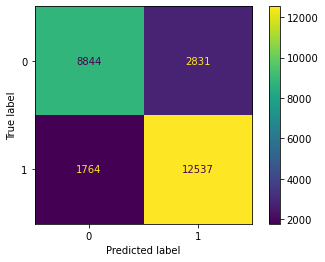

In [78]:
print(classification_report(y_test, predict_lr))
plot_confusion_matrix(model_lr, X_test, y_test)
roc_auc_score(y_test, predict_lr)

**Logistic Regression 2: Gridsearch + all features**

In [79]:
gridlg = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg=LogisticRegression()

logreg_cv=GridSearchCV(logreg,gridlg,cv=10)
logreg_cv.fit(X_train,y_gs_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [80]:
print("Tuned Hyperparameters: ",logreg_cv.best_params_)

Tuned Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}


In [81]:
logreg2=LogisticRegression(C=10,penalty="l2")
logreg2.fit(X_train,y_gs_train)
predict_lr2 = logreg2.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.71      0.76     11675
           1       0.79      0.87      0.83     14301

    accuracy                           0.80     25976
   macro avg       0.80      0.79      0.79     25976
weighted avg       0.80      0.80      0.80     25976



0.7895271036436411

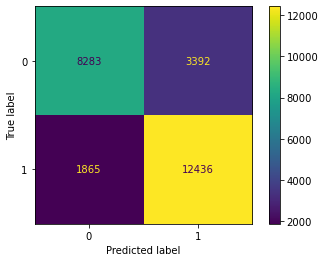

In [82]:
print(classification_report(y_gs_test, predict_lr2))
plot_confusion_matrix(logreg2, X_test, y_gs_test)
roc_auc_score(y_gs_test, predict_lr2)

**Logistic Regression 3: Gridsearch + top11**

In [83]:
gridlg = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg=LogisticRegression()

logreg_cv_top11=GridSearchCV(logreg,gridlg,cv=10)
logreg_cv_top11.fit(X_top11_train,y_gs_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [84]:
print("Tuned Hyperparameters: ",logreg_cv_top11.best_params_)

Tuned Hyperparameters:  {'C': 1.0, 'penalty': 'l2'}


In [85]:
logreg3=LogisticRegression(C=1,penalty="l2")
logreg3.fit(X_top11_train,y_gs_train)
predict_lr3 = logreg3.predict(X_top11_test)

              precision    recall  f1-score   support

           0       0.83      0.76      0.80     11675
           1       0.82      0.88      0.85     14301

    accuracy                           0.82     25976
   macro avg       0.83      0.82      0.82     25976
weighted avg       0.83      0.82      0.82     25976



0.8192034578675337

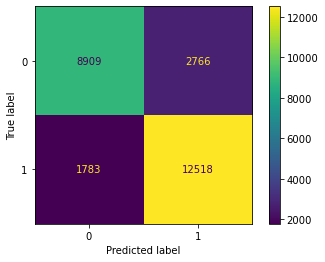

In [86]:
print(classification_report(y_gs_test, predict_lr3))
plot_confusion_matrix(logreg3, X_top11_test, y_gs_test)
roc_auc_score(y_gs_test, predict_lr3)

**Logistic Regression 4: Gridsearch + top6**

In [87]:
gridlg = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg=LogisticRegression()

logreg_cv_top6=GridSearchCV(logreg,gridlg,cv=10)
logreg_cv_top6.fit(X_top6_train,y_gs_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [88]:
print("Tuned Hyperparameters: ",logreg_cv_top6.best_params_)

Tuned Hyperparameters:  {'C': 0.01, 'penalty': 'l2'}


In [89]:
logreg4=LogisticRegression(C=0.01,penalty="l2")
logreg4.fit(X_top6_train,y_gs_train)
predict_lr4 = logreg4.predict(X_top6_test)

              precision    recall  f1-score   support

           0       0.81      0.76      0.79     11675
           1       0.81      0.85      0.83     14301

    accuracy                           0.81     25976
   macro avg       0.81      0.81      0.81     25976
weighted avg       0.81      0.81      0.81     25976



0.8082584662248653

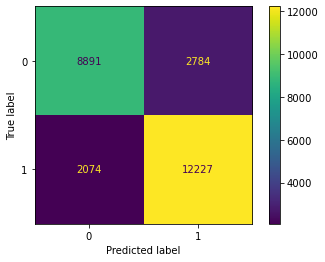

In [90]:
print(classification_report(y_gs_test, predict_lr4))
plot_confusion_matrix(logreg4, X_top6_test, y_gs_test)
roc_auc_score(y_gs_test, predict_lr4)

**Random Forest 1: Base**

In [91]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.95     25976
   macro avg       0.95      0.96      0.95     25976
weighted avg       0.95      0.95      0.95     25976



0.9550323534973895

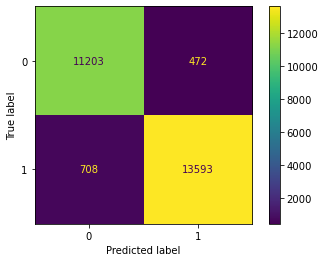

In [92]:
print(classification_report(y_test, predict_rf))
plot_confusion_matrix(model_rf, X_test, y_test)
roc_auc_score(y_test, predict_rf)

**Random Forest 2: Gridsearch + all features**

In [93]:
#Defining the grid and the parameters

model_grid = RandomForestClassifier(random_state=42)

grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 20),
        'min_samples_leaf': range(2,10)
       }

search = GridSearchCV(estimator=model_grid,
                      param_grid=grid,
                      cv=2,
                      verbose=1,
                      n_jobs=8,
                      return_train_score=True)

search.fit(X_train, y_gs_train)

search.best_estimator_

Fitting 2 folds for each of 304 candidates, totalling 608 fits


RandomForestClassifier(criterion='entropy', max_depth=19, min_samples_leaf=2,
                       random_state=42)

In [94]:
#training model

model_rf_grid= RandomForestClassifier(criterion='entropy', max_depth=19, min_samples_leaf=2,random_state=42)

model_rf_grid.fit(X_train, y_gs_train)
predict_rf_grid = model_rf_grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.96      0.95      0.96     14301

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



0.9532222675912363

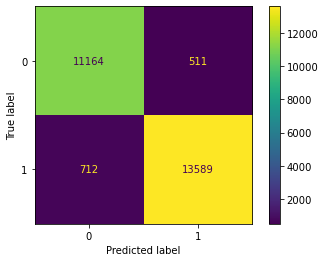

In [95]:
print(classification_report(y_test, predict_rf_grid))
plot_confusion_matrix(model_rf_grid, X_test, y_gs_test)
roc_auc_score(y_gs_test, predict_rf_grid)

**Random Forest 3: Gridsearch + top 11**

In [96]:
#Defining the grid and the parameters

model_grid = RandomForestClassifier(random_state=42)

grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 20),
        'min_samples_leaf': range(2,10)
       }

search = GridSearchCV(estimator=model_grid,
                      param_grid=grid,
                      cv=2,
                      verbose=1,
                      n_jobs=8,
                      return_train_score=True)

search.fit(X_top11_train, y_gs_train)

search.best_estimator_

Fitting 2 folds for each of 304 candidates, totalling 608 fits


RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=2,
                       random_state=42)

In [97]:
#training model

model_rf_grid11= RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=2, random_state=42)

model_rf_grid11.fit(X_top11_train, y_gs_train)
predict_rf_grid11 = model_rf_grid11.predict(X_top11_test)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     11675
           1       0.93      0.93      0.93     14301

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



0.9231023511480831

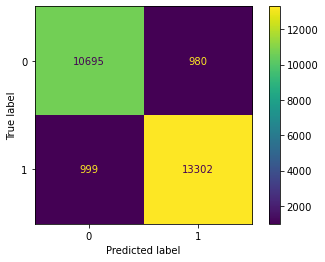

In [98]:
print(classification_report(y_gs_test, predict_rf_grid11))
plot_confusion_matrix(model_rf_grid11, X_top11_test, y_gs_test)
roc_auc_score(y_gs_test, predict_rf_grid11)

**Random Forest 4: Gridsearch + Top6**

In [100]:
#Defining the grid and the parameters

model_grid = RandomForestClassifier(random_state=42)

grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 20),
        'min_samples_leaf': range(2,10)
       }

search = GridSearchCV(estimator=model_grid,
                      param_grid=grid,
                      cv=2,
                      verbose=1,
                      n_jobs=8,
                      return_train_score=True)

search.fit(X_top6_train, y_gs_train)

search.best_estimator_

Fitting 2 folds for each of 304 candidates, totalling 608 fits


RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_leaf=4,
                       random_state=42)

In [101]:
#training model

model_rf_grid6= RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_leaf=4, random_state=42)

model_rf_grid6.fit(X_top6_train, y_gs_train)
predict_rf_grid6 = model_rf_grid6.predict(X_top6_test)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     11675
           1       0.90      0.91      0.91     14301

    accuracy                           0.90     25976
   macro avg       0.90      0.90      0.90     25976
weighted avg       0.90      0.90      0.90     25976



0.8955591461461717

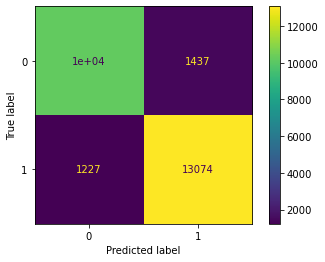

In [102]:
print(classification_report(y_gs_test, predict_rf_grid6))
plot_confusion_matrix(model_rf_grid6, X_top6_test, y_gs_test)
roc_auc_score(y_gs_test, predict_rf_grid6)

**Decision Tree 1: Base**

In [103]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train, y_train)
predict_dt = model_dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11675
           1       0.94      0.94      0.94     14301

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



0.9309136765416893

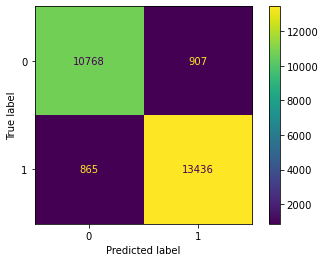

In [104]:
print(classification_report(y_test, predict_dt))
plot_confusion_matrix(model_dt, X_test, y_test)
roc_auc_score(y_test, predict_dt)

**Decision Tree 2: Gridsearch all**

In [105]:
model_dt_grid = DecisionTreeClassifier(random_state=42)


Grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 20),
        'min_samples_leaf': range(2,10),
        }


search_dt = GridSearchCV (estimator=model_dt_grid,
                         param_grid = grid,
                         n_jobs=8,
                         cv=2,
                         verbose=1,
                         return_train_score=True)

search_dt.fit(X_train, y_gs_train)

search_dt.best_estimator_

Fitting 2 folds for each of 304 candidates, totalling 608 fits


DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=2,
                       random_state=42)

In [106]:
model_dt_gs= DecisionTreeClassifier (criterion='entropy', max_depth=13, min_samples_leaf=2, random_state=42)

model_dt_gs.fit(X_train, y_gs_train)
predict_dt_gs = model_dt_gs.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11675
           1       0.96      0.94      0.95     14301

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



0.9435885302939988

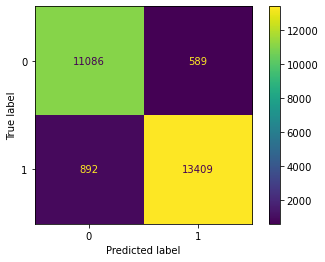

In [107]:
print(classification_report(y_gs_test, predict_dt_gs))
plot_confusion_matrix(model_dt_gs, X_test, y_gs_test)
roc_auc_score(y_gs_test, predict_dt_gs)

**Decision Tree 3: Gridsearch + top11**

In [108]:
model_dt_grid11 = DecisionTreeClassifier(random_state=42)


Grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 20),
        'min_samples_leaf': range(2,10),
        }


search_dt = GridSearchCV (estimator=model_dt_grid11,
                         param_grid = grid,
                         n_jobs=8,
                         cv=2,
                         verbose=1,
                         return_train_score=True)

search_dt.fit(X_top11_train, y_gs_train)

search_dt.best_estimator_

Fitting 2 folds for each of 304 candidates, totalling 608 fits


DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=9,
                       random_state=42)

In [109]:
model_dt_gs11= DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=9,random_state=42)

model_dt_gs11.fit(X_top11_train, y_gs_train)
predict_dt_gs11 = model_dt_gs11.predict(X_top11_test)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     11675
           1       0.92      0.92      0.92     14301

    accuracy                           0.91     25976
   macro avg       0.91      0.91      0.91     25976
weighted avg       0.91      0.91      0.91     25976



0.9118902992213749

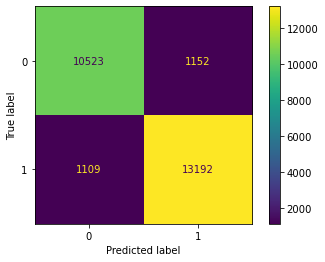

In [110]:
print(classification_report(y_gs_test, predict_dt_gs11))
plot_confusion_matrix(model_dt_gs11, X_top11_test, y_gs_test)
roc_auc_score(y_gs_test, predict_dt_gs11)

**Decision Tree 4: Gridsearch + top6**

In [111]:
model_dt_grid6 = DecisionTreeClassifier(random_state=42)


Grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 20),
        'min_samples_leaf': range(2,10),
        }


search_dt = GridSearchCV (estimator=model_dt_grid6,
                         param_grid = grid,
                         n_jobs=8,
                         cv=2,
                         verbose=1,
                         return_train_score=True)

search_dt.fit(X_top6_train, y_gs_train)

search_dt.best_estimator_

Fitting 2 folds for each of 304 candidates, totalling 608 fits


DecisionTreeClassifier(max_depth=16, min_samples_leaf=3, random_state=42)

In [112]:
model_dt_gs6= DecisionTreeClassifier (max_depth=16, min_samples_leaf=3,random_state=42)

model_dt_gs6.fit(X_top6_train, y_gs_train)
predict_dt_gs6 = model_dt_gs6.predict(X_top6_test)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     11675
           1       0.90      0.91      0.91     14301

    accuracy                           0.90     25976
   macro avg       0.90      0.89      0.90     25976
weighted avg       0.90      0.90      0.90     25976



0.8949368330062422

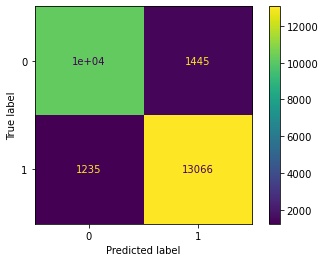

In [113]:
print(classification_report(y_gs_test, predict_dt_gs6))
plot_confusion_matrix(model_dt_gs6, X_top6_test, y_gs_test)
roc_auc_score(y_gs_test, predict_dt_gs6)

Let's talk about the result: **ROC-AUC Score**

In [114]:
ROC_AUC = {'Algorithms':['Logistic Regression', 'Random Forest', 'Decision Tree'],
              '1. Base':[(roc_auc_score(y_test, predict_lr)), (roc_auc_score(y_test, predict_rf)),
                         (roc_auc_score(y_test, predict_dt))],
              '2. Grid all':[(roc_auc_score(y_gs_test, predict_lr2)), (roc_auc_score(y_gs_test, predict_rf_grid)),
                             (roc_auc_score(y_gs_test, predict_dt_gs))],
              '3. Grid 11':[(roc_auc_score(y_gs_test, predict_lr3)), (roc_auc_score(y_gs_test, predict_rf_grid11)),
                             (roc_auc_score(y_gs_test, predict_dt_gs11))],
              '4. Grid 6':[(roc_auc_score(y_gs_test, predict_lr4)), (roc_auc_score(y_gs_test, predict_rf_grid6)),
                           (roc_auc_score(y_gs_test, predict_dt_gs6))]}

In [115]:
ROC_AUC_score = pd.DataFrame(ROC_AUC)
ROC_AUC_score

,Algorithms,1. Base,2. Grid all,3. Grid 11,4. Grid 6
0,Logistic Regression,0.817084,0.789527,0.819203,0.808258
1,Random Forest,0.955032,0.953222,0.923102,0.895559
2,Decision Tree,0.930914,0.943589,0.911890,0.894937


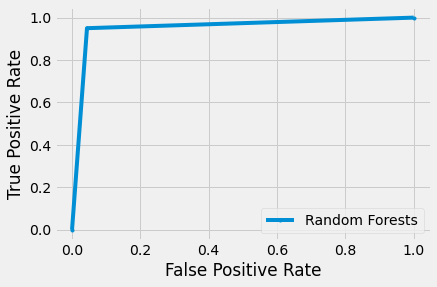

In [117]:
from sklearn.metrics import roc_curve
plt.style.use('fivethirtyeight')

rf_fpr, rf_tpr, _ = roc_curve(y_gs_test, predict_rf_grid)

# plot the roc curve for the model

plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forests')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

Based on the ROC_AUC Score above, the best model is **Random Forest with GridsearchCV using all features**

The most important service factors that contribute to passengers' satisfaction are **Inflight entertainment** and **Seat comfort**